# GLOBAL MODERN SLAVERY

## Business Objective

The primary objective of analyzing the Global Slavery Index (GSI) dataset is to develop a classification model that accurately categorizes countries based on their vulnerability to different types of modern slavery, specifically forced labor, human trafficking, and child exploitation. This classification will enable stakeholders to identify and prioritize regions where specific interventions are most needed, thereby contributing to more effective and targeted efforts in combating modern slavery globally.

Stakeholders:

1. Non-Governmental Organizations (NGOs):  NGOs that are focused on human rights and anti-slavery initiatives will benefit from the classification model by gaining insights into where their efforts can have the most impact, allowing them to tailor interventions to the specific types of slavery prevalent in different regions.
2. Governments and Policy Makers:  Governments can use the classification results to enhance their policy frameworks, strengthen law enforcement, and allocate resources more efficiently
3. International Bodies (e.g., United Nations, International Labour Organization):  These organizations can use the model's outputs to monitor global trends, coordinate international responses, and support countries in addressing their specific modern slavery challenges.
4. Academics and Researchers:  Scholars studying modern slavery can use the classification as a foundation for further research into the causes and solutions for different types of modern slavery.



## Data Understanding

The Global Slavery Index (GSI) dataset provides detailed data on modern slavery, including socio-economic, political, and demographic indicators across various countries. The dataset aims to measure the prevalence of modern slavery, encompassing different forms such as forced labor, human trafficking, and child exploitation. Additionally, it includes data on government responses, vulnerability factors, and regional differences, providing a comprehensive view of the global state of modern slavery.

#### Source of the data

The data for the Global Slavery Index is sourced from multiple authoritative bodies and research organizations, including but not limited to:
1. Walk Free Foundation: The primary organization behind the Global Slavery Index, which conducts extensive research and data collection on modern slavery.
2. International Labour Organization (ILO): Provides estimates and data on forced labor and other forms of modern slavery.
3. United Nations (UN): Offers data on human trafficking and child exploitation through various UN agencies.
4. World Bank: Supplies demographic and socio-economic indicators such as population, inequality, and governance.
5. National Surveys: Data collected from national-level surveys conducted in various countries to assess vulnerability to modern slavery.

These sources are integrated into the GSI dataset, ensuring that the data reflects a wide range of reliable inputs, though it's important to note that data collection methods may vary across countries.

#### Data Types

1. Numerical Data: Includes most features such as 'population', 'prevalence rate',' Estimated number of people in modern slavery' and 'various score' (e.g., governance issues, vulnerability scores).
2. Categorical Data: Includes 'Country' names and 'Regions', which may require encoding into numerical values for machine learning model training.

### IMPORTS AND DATA

In [1501]:
# Basic Data Manipulation
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import cross_val_score, GridSearchCV

#Feature Selection
from sklearn.feature_selection import RFE

#### Loading the dataset

In [1503]:
# Loading the dataset
file_path = '2023-Global-Slavery-Index-Data.xlsx' 
gsi_data = pd.read_excel(file_path, skiprows=2, sheet_name ='GSI 2023 summary data')


# Display the first few rows of the dataset.
gsi_data.head(5)

,Country,Population,Region,"Estimated prevalence of modern slavery per 1,000 population",Estimated number of people in modern slavery,Governance issues,Lack of basic needs,Inequality,Disenfranchised groups,Effects of conflict,Total Vulnerability score (%),Survivors of slavery are identified and supported to exit and remain out of modern slavery (%),Criminal justice mechanisms function effectively to prevent modern slavery (%),"Coordination occurs at the national and regional level and across borders, and governments are held to account for their response (%)","Risk factors, such as attitudes, social systems, and institutions that enable modern slavery are addressed (%)",Government and business stop sourcing goods and services produced by forced labour (%),Government response total (%)
0,Afghanistan,38928000,Asia and the Pacific,12.959972,505000.0,74.809036,49.411156,71.195145,73.209302,98.446933,86.166232,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2878000,Europe and Central Asia,11.813945,34000.0,38.909387,30.682720,43.824288,68.409078,21.603999,39.505598,54.545456,69.230766,75.0,78.571426,12.5,61.538460
2,Algeria,43851000,Africa,1.922731,84000.0,53.957802,27.432023,30.482865,57.740208,33.520191,43.059746,22.727272,53.846153,37.5,42.857143,0.0,35.897434
3,Angola,32866000,Africa,4.136549,136000.0,51.223303,62.837397,54.912565,70.620563,29.198937,61.072812,59.090908,46.153847,62.5,28.571428,0.0,43.589745
4,Antigua and Barbuda,98000,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.363636,53.846153,62.5,50.000000,0.0,43.589745


In [1504]:
gsi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 17 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   Country                                                                                                                                180 non-null    object 
 1   Population                                                                                                                             180 non-null    int64  
 2   Region                                                                                                                                 180 non-null    object 
 3   Estimated prevalence of modern slavery per 1,000 population           

In [1505]:
# Checking the number of rows and columns in the dataset
gsi_data.shape

(180, 17)

### Data Preparation/Cleaning

##### Checking for missing Values

In [1508]:
# Check for missing values in the entire dataset
missing_values = gsi_data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Estimated prevalence of modern slavery per 1,000 population                                                                              20
Estimated number of people in modern slavery                                                                                             20
Governance issues                                                                                                                        20
Lack of basic needs                                                                                                                      20
Inequality                                                                                                                               20
Disenfranchised groups                                                                                                                   20
Effects of conflict                                                                                                                      20
Total Vulnerability 

#### Calculating the percentage of missing data

In [1510]:
# Calculate the percentage of missing values for each column
missing_percentage = gsi_data.isnull().sum() / len(gsi_data) * 100

# Display columns with missing values and their percentage
print(missing_percentage[missing_percentage > 0])

Estimated prevalence of modern slavery per 1,000 population                                                                              11.111111
Estimated number of people in modern slavery                                                                                             11.111111
Governance issues                                                                                                                        11.111111
Lack of basic needs                                                                                                                      11.111111
Inequality                                                                                                                               11.111111
Disenfranchised groups                                                                                                                   11.111111
Effects of conflict                                                                                                   

### Handling missing values

Since the percentage of missing values are less than 15% , then i will choose to impute the missing values instead of dropping the columns with missing values. Imputation has a minimal impact on the whole dataset and helps maintain a robust dataset.

In [1513]:
# Imputing missing values with the mean for numerical columns
gsi_data['Estimated prevalence of modern slavery per 1,000 population'].fillna(gsi_data['Estimated prevalence of modern slavery per 1,000 population'].mean(), inplace=True)
gsi_data['Estimated number of people in modern slavery'].fillna(gsi_data['Estimated number of people in modern slavery'].mean(), inplace=True)
gsi_data['Governance issues'].fillna(gsi_data['Governance issues'].mean(), inplace=True)
gsi_data['Lack of basic needs'].fillna(gsi_data['Lack of basic needs'].mean(), inplace=True)
gsi_data['Inequality'].fillna(gsi_data['Inequality'].mean(), inplace=True)
gsi_data['Disenfranchised groups'].fillna(gsi_data['Disenfranchised groups'].mean(), inplace=True)
gsi_data['Effects of conflict'].fillna(gsi_data['Effects of conflict'].mean(), inplace=True)
gsi_data['Total Vulnerability score (%)'].fillna(gsi_data['Total Vulnerability score (%)'].mean(), inplace=True)
gsi_data['Survivors of slavery are identified and supported to exit and remain out of modern slavery (%)'].fillna(gsi_data['Survivors of slavery are identified and supported to exit and remain out of modern slavery (%)'].mean(), inplace=True)
gsi_data['Criminal justice mechanisms function effectively to prevent modern slavery (%)'].fillna(gsi_data['Criminal justice mechanisms function effectively to prevent modern slavery (%)'].mean(), inplace=True)
gsi_data['Coordination occurs at the national and regional level and across borders, and governments are held to account for their response (%)'].fillna(gsi_data['Coordination occurs at the national and regional level and across borders, and governments are held to account for their response (%)'].mean(), inplace=True)
gsi_data['Risk factors, such as attitudes, social systems, and institutions that enable modern slavery are addressed (%)'].fillna(gsi_data['Risk factors, such as attitudes, social systems, and institutions that enable modern slavery are addressed (%)'].mean(), inplace=True)
gsi_data['Government and business stop sourcing goods and services produced by forced labour (%)'].fillna(gsi_data['Government and business stop sourcing goods and services produced by forced labour (%)'].mean(), inplace=True)
gsi_data['Government response total (%)'].fillna(gsi_data['Government response total (%)'].mean(), inplace=True)

#### Checking for missing values after imputation

In [1515]:
# Checking for missing values after imputation
missing_values_after_imputation = gsi_data.isnull().sum()

# Printing columns with any remaining missing values
print(missing_values_after_imputation[missing_values_after_imputation > 0])

# Checking the number of rows and columns in the dataset
gsi_data.shape

Series([], dtype: int64)


(180, 17)

There are NO MORE missing values in the dataset. And the number of rows still maintain to be 180 rows and 17 columns, since no culumn has been dropped.

#### Checking for duplicates

In [1518]:
duplicates = gsi_data.duplicated()

#Displaying the number of duplicate rows
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 0


There are NO duplicates in the dataset

#### Encoding columns with the categorical Values

In [1521]:
#Identify categorical columns
categorical_columns = gsi_data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Country', 'Region'], dtype='object')


In [1522]:
east_africa_countries = [
    'Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi', 
    'Ethiopia', 'Somalia', 'South Sudan'
]

# Filter the dataset for East African countries
filtered_df = gsi_data[gsi_data['Country'].isin(east_africa_countries)]
filtered_df

,Country,Population,Region,"Estimated prevalence of modern slavery per 1,000 population",Estimated number of people in modern slavery,Governance issues,Lack of basic needs,Inequality,Disenfranchised groups,Effects of conflict,Total Vulnerability score (%),Survivors of slavery are identified and supported to exit and remain out of modern slavery (%),Criminal justice mechanisms function effectively to prevent modern slavery (%),"Coordination occurs at the national and regional level and across borders, and governments are held to account for their response (%)","Risk factors, such as attitudes, social systems, and institutions that enable modern slavery are addressed (%)",Government and business stop sourcing goods and services produced by forced labour (%),Government response total (%)
25,Burundi,11891000,Africa,7.506072,89000.0,76.551670,58.465070,53.708864,76.159576,45.629072,76.698949,22.727272,42.307693,62.500000,14.285714,0.000000,29.487179
52,Ethiopia,114964000,Africa,6.319561,727000.0,53.657061,58.946714,41.162818,79.059425,70.017937,67.225118,40.909092,53.846153,50.000000,57.142857,0.000000,44.871796
82,Kenya,53771000,Africa,5.003463,269000.0,56.757120,57.197418,48.087456,67.534394,63.209311,66.173292,54.545456,50.000000,50.000000,50.000000,0.000000,46.153847
134,Rwanda,12952000,Africa,4.252304,55000.0,39.768667,61.266299,39.343538,78.192625,31.262645,52.936825,54.545456,61.538460,37.500000,57.142857,0.000000,50.000000
146,Somalia,15893000,Africa,6.173291,98000.0,92.826190,62.223263,68.400000,85.755049,80.389259,98.366583,9.090909,26.923077,25.000000,21.428572,0.000000,17.948717
149,South Sudan,11194000,Africa,10.293152,115000.0,98.559206,57.334819,73.208631,86.487607,75.063965,100.000000,43.827479,53.222345,53.409091,47.727273,6.676136,44.833010
159,Tanzania,59734000,Africa,2.859691,171000.0,49.894392,52.976108,50.229403,63.720471,22.314152,53.259234,45.454544,53.846153,50.000000,35.714287,0.000000,42.307693
167,Uganda,45741000,Africa,4.151514,190000.0,48.010677,72.731170,51.523663,70.798195,29.098998,61.919639,50.000000,50.000000,75.000000,42.857143,0.000000,46.153847


### Log transformation

##### Examining distribution of the two columns with bigger values

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


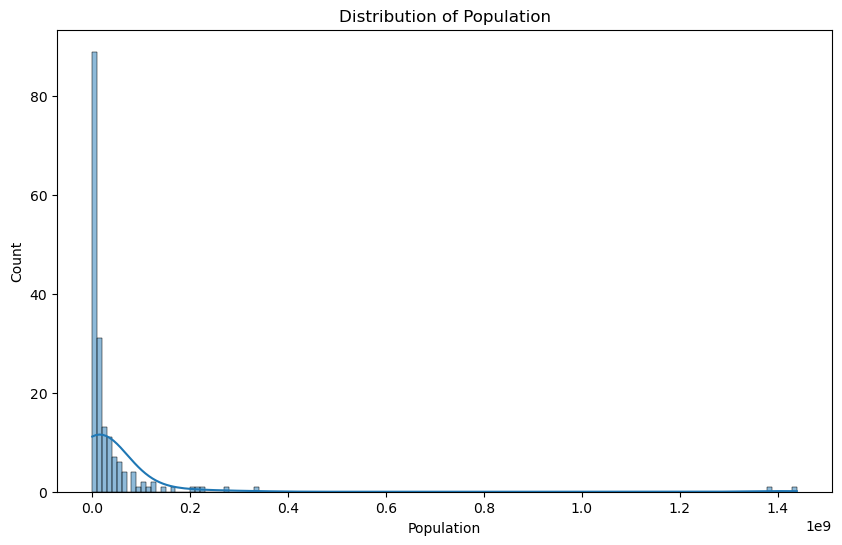

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


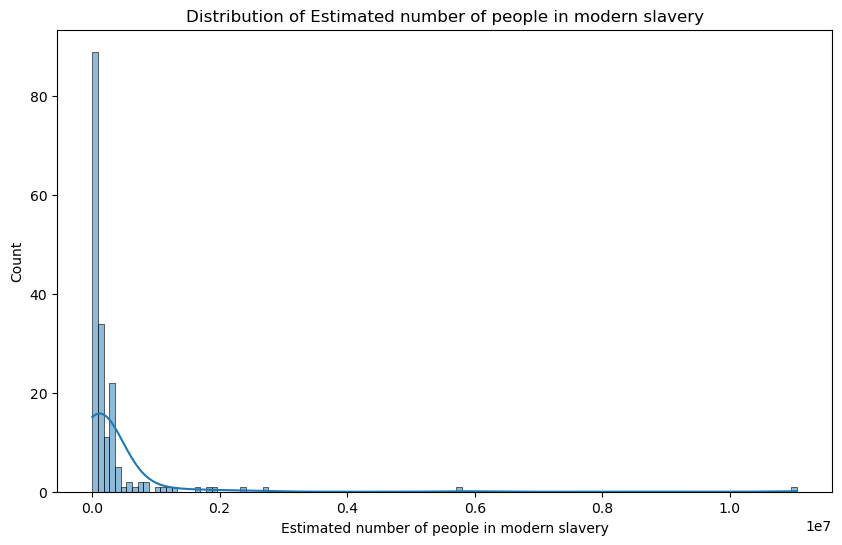

In [1525]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the columns
columns_to_check = ['Population','Estimated number of people in modern slavery']

for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.histplot(gsi_data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

The two columns ( 'Population', 'Estimated number of people in modern slavery') are highly skewed to the right which therefore requires log transformation.

#### Applying log transformation

In [1528]:
gsi_data['log_Population'] = np.log(gsi_data['Population'] +1)
gsi_data['log_Estimated_modern_slavery'] = np.log(gsi_data['Estimated number of people in modern slavery'] +1)

In [1529]:
# Check the column names in the dataset
print(gsi_data.columns)

Index(['Country', 'Population', 'Region',
       'Estimated prevalence of modern slavery per 1,000 population',
       'Estimated number of people in modern slavery', 'Governance issues',
       'Lack of basic needs', 'Inequality', 'Disenfranchised groups',
       'Effects of conflict', 'Total Vulnerability score (%)',
       'Survivors of slavery are identified and supported to exit and remain out of modern slavery (%)',
       'Criminal justice mechanisms function effectively to prevent modern slavery (%)',
       'Coordination occurs at the national and regional level and across borders, and governments are held to account for their response (%)',
       'Risk factors, such as attitudes, social systems, and institutions that enable modern slavery are addressed (%)',
       'Government and business stop sourcing goods and services produced by forced labour (%)',
       'Government response total (%)', 'log_Population',
       'log_Estimated_modern_slavery'],
      dtype='object')


### Standardizing the dataset

I choose to work with standardization over normalization, since i will be working with Logistic Regression together with Decision trees.This algorithms benefits from standardization because it assumes the input data is normally distributed which help the model converge faster and make the coefficients more interpretable.

In [1532]:
# Instantiate the scaler
scaler = StandardScaler()

# Selecting the numerical columns
columns_to_scale = gsi_data.select_dtypes(include=[np.number]).columns  

# Applying standardization
gsi_data[columns_to_scale] = scaler.fit_transform(gsi_data[columns_to_scale])

# Verifying the standardization
gsi_data.head(5)

,Country,Population,Region,"Estimated prevalence of modern slavery per 1,000 population",Estimated number of people in modern slavery,Governance issues,Lack of basic needs,Inequality,Disenfranchised groups,Effects of conflict,Total Vulnerability score (%),Survivors of slavery are identified and supported to exit and remain out of modern slavery (%),Criminal justice mechanisms function effectively to prevent modern slavery (%),"Coordination occurs at the national and regional level and across borders, and governments are held to account for their response (%)","Risk factors, such as attitudes, social systems, and institutions that enable modern slavery are addressed (%)",Government and business stop sourcing goods and services produced by forced labour (%),Government response total (%),log_Population,log_Estimated_modern_slavery
0,Afghanistan,-0.028049,Asia and the Pacific,0.562868,0.198199,1.361304e+00,7.252907e-01,1.749598e+00,8.137814e-01,3.116948e+00,1.863451,0.000000,5.746980e-16,-4.167283e-16,0.000000,-7.788918e-17,-5.761767e-16,0.589109,1.133805
1,Albania,-0.264171,Europe and Central Asia,0.451796,-0.280989,-4.177385e-01,-6.132364e-01,4.737491e-02,5.150308e-01,-4.280880e-01,-0.330631,0.634938,1.294786e+00,1.266292e+00,1.774277,5.107262e-01,1.354639e+00,-0.297755,-0.546593
2,Algeria,0.004196,Africa,-0.506858,-0.230120,3.280005e-01,-8.455647e-01,-7.823426e-01,-1.489655e-01,1.216481e-01,-0.163508,-1.249987,5.045457e-02,-9.330569e-01,-0.280149,-5.854666e-01,-7.245829e-01,0.629656,0.016684
3,Angola,-0.067754,Africa,-0.292295,-0.177216,1.924898e-01,1.684868e+00,7.369669e-01,6.526666e-01,-7.770662e-02,0.683505,0.904213,-5.717112e-01,5.331754e-01,-1.101920,-5.854666e-01,-1.008160e-01,0.531471,0.316766
4,Antigua and Barbuda,-0.282379,Americas,0.000000,0.000000,3.521164e-16,5.078271e-16,4.418942e-16,4.422191e-16,1.638992e-16,0.000000,-0.442162,5.045457e-02,5.331754e-01,0.130736,-5.854666e-01,-1.008160e-01,-1.448590,0.830268


#### Displaying statistics for standadized features

In [1534]:
# Display basic statistics for the standardized features
print(gsi_data[['Governance issues', 'Lack of basic needs', 'Total Vulnerability score (%)', 'Criminal justice mechanisms function effectively to prevent modern slavery (%)', 'Effects of conflict']].describe())

       Governance issues  Lack of basic needs  Total Vulnerability score (%)  \
count       1.800000e+02         1.800000e+02                   1.800000e+02   
mean        5.033011e-16         2.467162e-16                  -5.921189e-17   
std         1.002789e+00         1.002789e+00                   1.002789e+00   
min        -2.179895e+00        -1.553521e+00                  -2.141246e+00   
25%        -4.581457e-01        -8.377875e-01                  -5.019988e-01   
50%         3.521164e-16         5.078271e-16                   0.000000e+00   
75%         6.197084e-01         7.642934e-01                   5.715394e-01   
max         2.538267e+00         2.592890e+00                   2.513945e+00   

       Criminal justice mechanisms function effectively to prevent modern slavery (%)  \
count                                       1.800000e+02                                
mean                                        3.268990e-16                                
std         

## EDA (Exploratory Data Analysis)

### Adding a new column 'Slavery type'

I choose to add a new column 'Slavery Type' since we do not have such a column and my objective is to classify countries based on their vulnerability to  different types of Modern Slavery.

In [1538]:

def classify_slavery(row):
    # Defining thresholds based on standard deviation from the mean.
    if row['Lack of basic needs'] > 1 or row['Total Vulnerability score (%)'] > 1:
        return 'Forced Labor'
    elif row['Governance issues'] > 1 or row['Criminal justice mechanisms function effectively to prevent modern slavery (%)'] < 0.2:
        return 'Human Trafficking'
    elif row['Effects of conflict'] > 1:
        return 'Child Exploitation'
    else:
        return 'Other'

# Apply the classification function to create the 'Slavery_Type' column
gsi_data['Slavery_Type'] = gsi_data.apply(classify_slavery, axis=1)



In [1539]:
# Verifying the new column
print(gsi_data[['Country', 'Region', 'Slavery_Type']].head(20))

                   Country                   Region        Slavery_Type
0              Afghanistan     Asia and the Pacific        Forced Labor
1                  Albania  Europe and Central Asia               Other
2                  Algeria                   Africa   Human Trafficking
3                   Angola                   Africa        Forced Labor
4      Antigua and Barbuda                 Americas   Human Trafficking
5                Argentina                 Americas               Other
6                  Armenia  Europe and Central Asia               Other
7                Australia     Asia and the Pacific               Other
8                  Austria  Europe and Central Asia               Other
9               Azerbaijan  Europe and Central Asia               Other
10                 Bahamas                 Americas               Other
11                 Bahrain              Arab States   Human Trafficking
12              Bangladesh     Asia and the Pacific  Child Explo

#### Checking the count of the 'Slavery Type'

In [1541]:
# Count each unique value in the 'Slavery_Type' column
slavery_type_counts = gsi_data['Slavery_Type'].value_counts()

# Print the counts
print("\nCounts of each Slavery Type:")
print(slavery_type_counts)


Counts of each Slavery Type:
Slavery_Type
Human Trafficking     69
Other                 63
Forced Labor          44
Child Exploitation     4
Name: count, dtype: int64


#### Getting the list of countries with their slavery type

In [1543]:
# listing countries for each type of slavery type
forced_labor_countries = gsi_data[gsi_data['Slavery_Type'] == 'Forced Labor']['Country'].tolist()
human_trafficking_countries = gsi_data[gsi_data['Slavery_Type'] == 'Human Trafficking']['Country'].tolist()
child_exploitation_countries = gsi_data[gsi_data['Slavery_Type'] == 'Child Exploitation']['Country'].tolist()

# Printing the lists
print("Countries with Forced Labor:")
print(forced_labor_countries)

print("\nCountries with Human Trafficking:")
print(human_trafficking_countries)

print("\nCountries with Child Exploitation:")
print(child_exploitation_countries)

Countries with Forced Labor:
['Afghanistan', 'Angola', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Democratic Republic of the Congo', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Guinea-Bissau', 'Haiti', 'Iran', 'Iraq', 'Kenya', 'Lao PDR', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Mali', 'Mozambique', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'North Korea', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Republic of the Congo', 'Rwanda', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Syria', 'Timor-Leste', 'Uganda', 'Yemen', 'Zambia', 'Zimbabwe']

Countries with Human Trafficking:
['Algeria', 'Antigua and Barbuda', 'Bahrain', 'Barbados', 'Belarus', 'Benin', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Cape Verde', 'China', 'Colombia', "Côte d'Ivoire", 'Cuba', 'Egypt', 'Estonia', 'Eswatini', 'Fiji', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Honduras', 'Hong Kong', 'Iceland', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kosovo'

#### A visualization showing Number of Countries  by Type of Modern Slavery

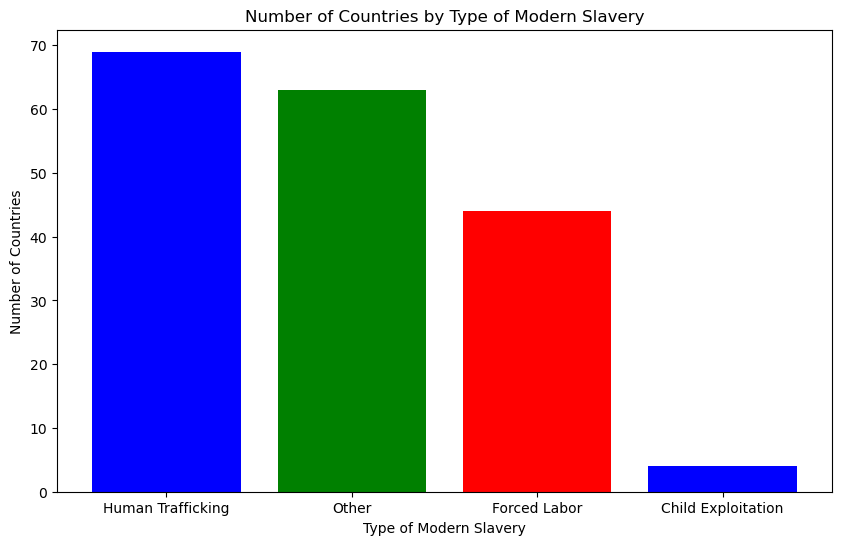

In [1545]:
import matplotlib.pyplot as plt

# Visualizing the counts of each Slavery Type
plt.figure(figsize=(10, 6))
plt.bar(slavery_type_counts.index, slavery_type_counts.values, color=['blue', 'green', 'red'])

plt.title('Number of Countries by Type of Modern Slavery')
plt.xlabel('Type of Modern Slavery')
plt.ylabel('Number of Countries')
plt.show()

### Observations

Human trafficking is the most prevalent form of modern slavery in the dataset, with 69 occurrences. This indicates that a significant portion of the population is affected by or at risk of human trafficking. Where the human traficking is a combination of poor Governance and a poor Criminal justice mechanism.

The "Other" category has 63 cases. This suggests that there are various forms of modern slavery that do not fit into the specified categories, and they collectively represent a large portion of the problem.

Forced labor is the third most common type of modern slavery, with 44 cases. This indicates that a considerable number of people are subjected to forced labor, highlighting the ongoing exploitation of individuals in work environments. Forced labour is categotrized by luck of basic needs and vulnerability of the people.

Child exploitation is the least common form of modern slavery in the dataset, with only 4 recorded cases. However, despite the lower number, the impact on affected children is likely severe, making this a critical issue even if it appears less frequently in the data.Child Exploitation is categorized by the effects of conflicts in the society which directly affects the children.

### Plotting Estimation Prevalence for  Modern Slavery for the First Five Countries

In [1549]:
import matplotlib.pyplot as plt

# Selecting the first 5 countries
top_5_countries = gsi_data[['Country', 'Estimated prevalence of modern slavery per 1,000 population']].head(5)

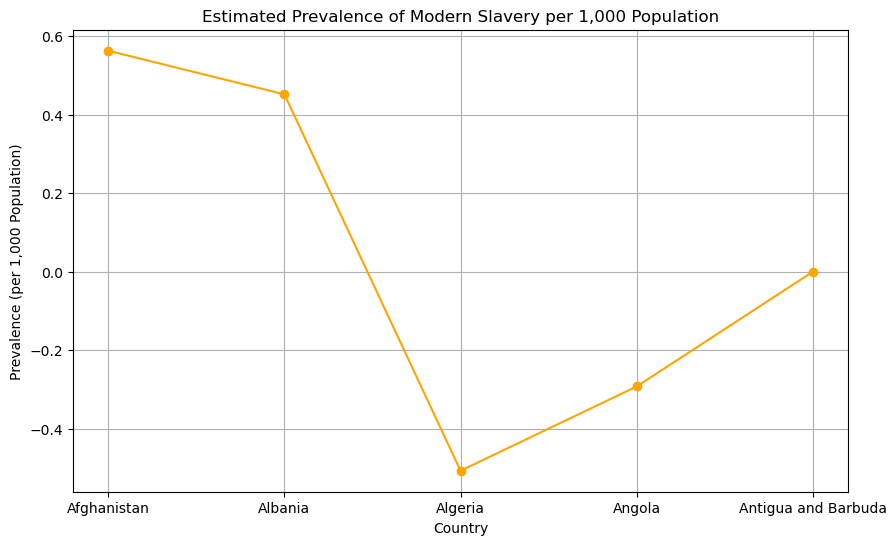

In [1550]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(top_5_countries['Country'], top_5_countries['Estimated prevalence of modern slavery per 1,000 population'], marker='o', linestyle='-', color='orange')
plt.title('Estimated Prevalence of Modern Slavery per 1,000 Population')
plt.xlabel('Country')
plt.ylabel('Prevalence (per 1,000 Population)')
plt.grid(True)
plt.show()

### Observations

Afghanistan has the highest estimated prevalence of modern slavery, indicating a relatively higher issues compared to the others.
Algeria and Angola shows a negative value suggesting it has a very low prevalence to modern slavery.

### Plotting an Estimation of Number of people in modern Slavery by country

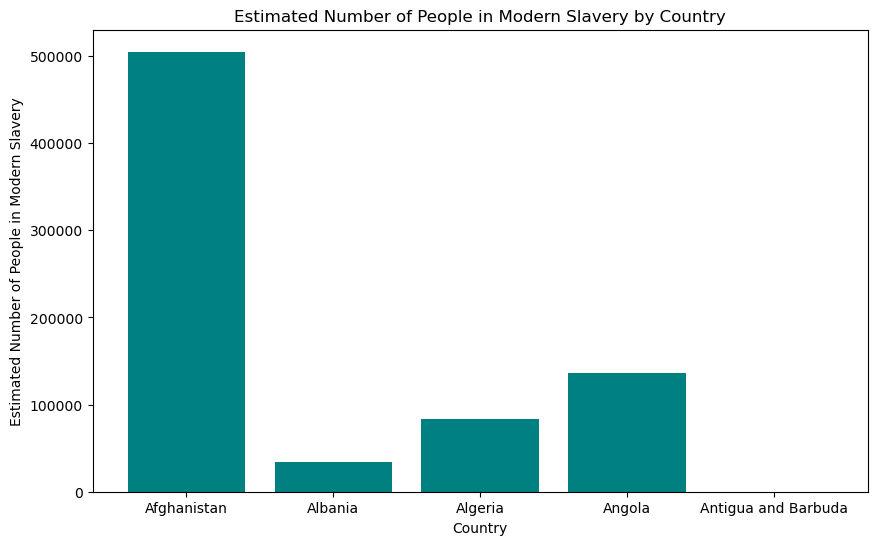

In [1553]:
import matplotlib.pyplot as plt

first_5_countries = gsi_data[['Country', 'Estimated prevalence of modern slavery per 1,000 population']].head(5)

# Sample data, replace with your actual dataset
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda']
estimated_slavery = [505000, 34000, 84000, 136000, 0] 

plt.figure(figsize=(10, 6))
plt.bar(countries, estimated_slavery,  color='teal')

# Adding titles and labels
plt.title('Estimated Number of People in Modern Slavery by Country')
plt.xlabel('Country')
plt.ylabel('Estimated Number of People in Modern Slavery')

plt.show()

### Observations

The country with the highest number of people in Modern Slavery is Afaghanistan with an estimation of around 500,000 people. Angola having more than a 100,000 people still in modern slavery. Antigua nd Barbuda has a missing value of the estimated number of people, while Albania having less than 50,000 people still living in modern slavery.

### Visualizing the estimated number of people in modern slavery in east africa countries

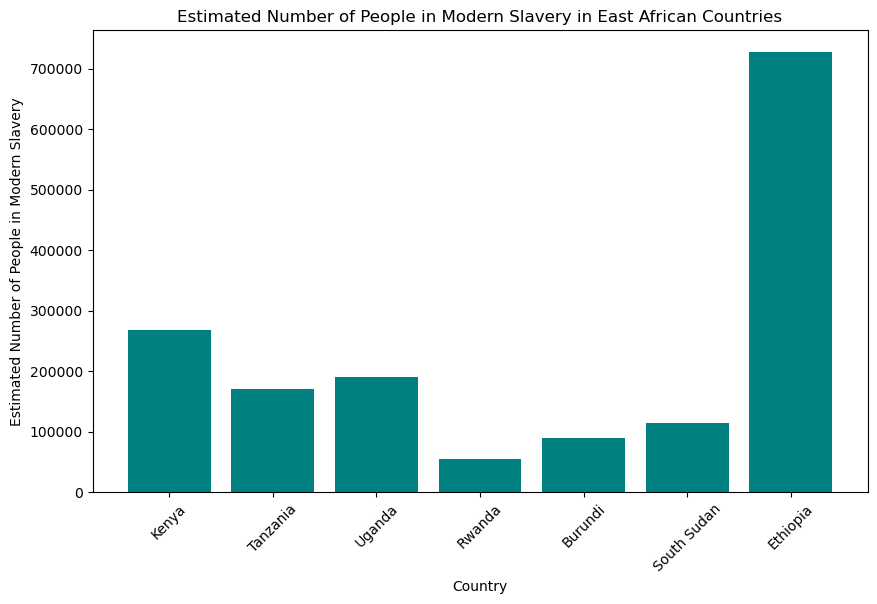

In [1557]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the East African countries and their estimated number of people in modern slavery
east_africa_countries = ['Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi', 'South Sudan', 'Ethiopia']
estimated_number_of_people = [269000, 171000, 190000, 55000, 89000, 115000, 727000]

# Creating a DataFrame for plotting
plot_data = pd.DataFrame({
    'Country': east_africa_countries,
    'Estimated Number of People in Modern Slavery': estimated_number_of_people
})

# Plotting the estimated number of people in modern slavery for East African countries
plt.figure(figsize=(10, 6))
plt.bar(plot_data['Country'], plot_data['Estimated Number of People in Modern Slavery'], color='teal')

# Adding titles and labels
plt.title('Estimated Number of People in Modern Slavery in East African Countries')
plt.xlabel('Country')
plt.ylabel('Estimated Number of People in Modern Slavery')
plt.xticks(rotation=45)
plt.show()

### Observations

In East Africa Countries, Ethiopia is the leading with 700,000 people living in modern slavery. Followed by Kenya with approximately 250,000 people still living in modern slavery.Rwanda having the least number of people in modern slavery.

## Splitting the data

In [1561]:
#Define 'features' and 'Target variable'
features = ['Governance issues', 'Lack of basic needs', 'Total Vulnerability score (%)',
             'Criminal justice mechanisms function effectively to prevent modern slavery (%)',
             'Effects of conflict']
target = 'Slavery_Type'

#Splitting the data into 'features' and 'Target variable'
X = gsi_data[features]
y = gsi_data[target]

In [1562]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Introducing the models

## Logistic Regression

In [1565]:
# Instantiating the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

#### Training the model

In [1567]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

#### Making predictions

In [1569]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_log_reg

array(['Other', 'Other', 'Human Trafficking', 'Other',
       'Human Trafficking', 'Other', 'Forced Labor', 'Human Trafficking',
       'Other', 'Other', 'Other', 'Forced Labor', 'Other',
       'Human Trafficking', 'Human Trafficking', 'Human Trafficking',
       'Human Trafficking', 'Other', 'Human Trafficking', 'Forced Labor',
       'Other', 'Human Trafficking', 'Other', 'Forced Labor', 'Other',
       'Other', 'Human Trafficking', 'Human Trafficking',
       'Human Trafficking', 'Human Trafficking', 'Forced Labor', 'Other',
       'Human Trafficking', 'Other', 'Forced Labor', 'Human Trafficking',
       'Forced Labor', 'Other', 'Human Trafficking', 'Forced Labor',
       'Child Exploitation', 'Forced Labor', 'Forced Labor',
       'Human Trafficking', 'Forced Labor', 'Other', 'Forced Labor',
       'Human Trafficking', 'Human Trafficking', 'Forced Labor', 'Other',
       'Child Exploitation', 'Human Trafficking', 'Human Trafficking'],
      dtype=object)

#### Evaluating the model

In [1571]:
# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg, zero_division=0))
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8333333333333334
                    precision    recall  f1-score   support

Child Exploitation       0.50      1.00      0.67         1
      Forced Labor       0.69      0.90      0.78        10
 Human Trafficking       0.81      0.81      0.81        21
             Other       1.00      0.82      0.90        22

          accuracy                           0.83        54
         macro avg       0.75      0.88      0.79        54
      weighted avg       0.86      0.83      0.84        54

[[ 1  0  0  0]
 [ 1  9  0  0]
 [ 0  4 17  0]
 [ 0  0  4 18]]


### Observations

#### Analyzing the metrics

1. Accuracy:
   0.833: The model correctly predicted about 83.3% of the cases overall.

2. Precision:
   - Child Exploitation: 0.50: Half of the predictions made for this class were correct.
   - Forced Labor: 0.69: 69% of the predictions for this class were correct.
   - Human Trafficking: 0.81: 81% of the predictions for this class were correct.
   - Other: 1.00: All predictions made for this class were correct, indicating no false positives.

3. Recall:
   - Child Exploitation: 1.00: The model correctly identified the only instance of this class.
   - Forced Labor: 0.90: The model correctly identified 90% of the actual cases for this class.
   - Human Trafficking: 0.81: The model correctly identified 81% of the actual cases for this class.
   - Other: 0.82: The model correctly identified 82% of the actual cases for this class.

4. F1-Score:
   - Child Exploitation: 0.67: Despite perfect recall, the low precision led to a moderate F1 score.
   - Forced Labor: 0.78: The F1 score reflects a balance between precision and recall.
   - Human Trafficking: 0.81: The model performed consistently well in this class.
   - Other: 0.90: High precision and decent recall contributed to a strong F1 score.

5. Averages:
   - Macro Average:
     - Precision: 0.75: On average, the model's precision across all classes was moderate.
     - Recall: 0.88: On average, the model was quite good at identifying actual instances across all classes.
     - F1-Score: 0.79: Reflects the overall balance between precision and recall.                                                                        

6. Weighted Average:
   - Precision: 0.86: Weighted by support, the precision was quite high.
   - Recall: 0.83: The model was generally accurate across all classes, considering their distribution.
   - F1-Score: 0.84: Indicates overall model performance, balancing precision and recall.

7. Confusion Matrix:
   - Child Exploitation: 1 instance was correctly classified, with no misclassifications.
   - Forced Labor: 9 instances were correctly classified, with 1 misclassification.
   - Human Trafficking: 17 instances were correctly classified, with 4 misclassifications.
   - Other: 18 instances were correctly classified, with 4 misclassifications.



#### Summary

The model performs well in general but has some challenges with the "Child Exploitation" class due to the small number of samples. The high precision for the "Other" class is particularly notable, while "Forced Labor" and "Human Trafficking" show a good balance of precision and recall. The overall accuracy of 83.3% indicates that the model is relatively reliable.

#### A plot of Logistic regressin Confusion matrix

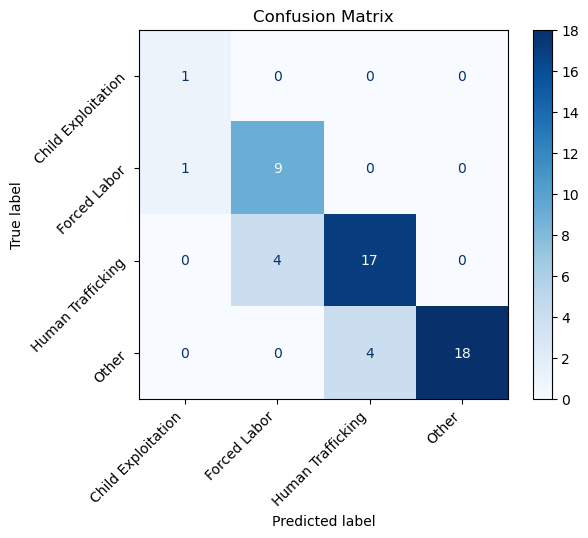

In [1578]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)

# Plot confusion matrix with rotated labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())

#the x-axis labels (Predicted labels)
plt.xticks(rotation=45, ha='right', fontsize=10)

#the y-axis labels (True labels)
plt.yticks(rotation=45, ha='right', fontsize=10)

plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:

  Child Exploitation: 1 instance was correctly classified, with no misclassifications.
  
  Forced Labor: 9 instances were correctly classified, with 1 misclassification.
  
  Human Trafficking: 17 instances were correctly classified, with 4 misclassifications.
  
  Other: 18 instances were correctly classified, with 4 misclassifications.

### Plotting ROC Curve for Logistic regression

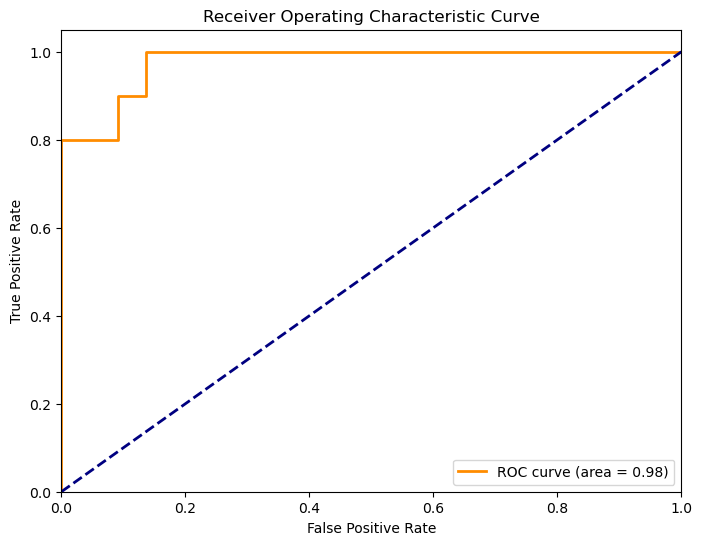

In [1581]:
from sklearn.metrics import roc_curve, auc

# for Predicting probabilities
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  

# Computing the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=log_reg.classes_[1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

From the Rock Curve , you can see the orange line is way above the diagonal line at a positive rate of 0.98, which is close to 1.0 suggesting that logistic regression model is effectively distinguishing between the positive and negative classes.

## Decision Trees

#### Identifying the 'Target variable' and 'features' in Decision Trees

In [1585]:
# Defining the 'Target Variable' Y and 'features' X
X = gsi_data.drop('Slavery_Type', axis=1)
y = gsi_data['Slavery_Type']

#### instantiating  the model

In [1587]:
classifier = DecisionTreeClassifier(random_state=42)
classifier

DecisionTreeClassifier(random_state=42)

#### Encoding categorical variable 'Country' and 'Region'

In [1589]:
X = gsi_data.drop('Slavery_Type', axis=1)
y = gsi_data['Slavery_Type']

# Define categorical columns
categorical_features = ['Country', 'Region']

# Ensuring these columns exist in X (and X_train)
assert all(col in X.columns for col in categorical_features), "Some columns in categorical_features do not exist in X."

# Define a preprocessor to handle categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)  # Corrected variable name
    ], remainder='passthrough')

# Create a pipeline that includes both the preprocessor and the classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



#### Training the model

In [1591]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Country', 'Region'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Making predictions

In [1593]:
# Prediction on the test data
y_pred = clf.predict(X_test)
y_pred

array(['Other', 'Other', 'Human Trafficking', 'Other',
       'Human Trafficking', 'Other', 'Human Trafficking',
       'Human Trafficking', 'Other', 'Other', 'Other', 'Forced Labor',
       'Other', 'Human Trafficking', 'Other', 'Other', 'Forced Labor',
       'Other', 'Forced Labor', 'Forced Labor', 'Other',
       'Human Trafficking', 'Other', 'Forced Labor', 'Other', 'Other',
       'Human Trafficking', 'Other', 'Human Trafficking',
       'Human Trafficking', 'Forced Labor', 'Other', 'Human Trafficking',
       'Other', 'Forced Labor', 'Human Trafficking', 'Forced Labor',
       'Other', 'Human Trafficking', 'Forced Labor', 'Child Exploitation',
       'Forced Labor', 'Forced Labor', 'Other', 'Forced Labor', 'Other',
       'Forced Labor', 'Human Trafficking', 'Human Trafficking',
       'Forced Labor', 'Other', 'Forced Labor', 'Human Trafficking',
       'Human Trafficking'], dtype=object)

#### Evaluating the model

In [1595]:
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Generating a classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Generating a confusion matrix
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.9074074074074074
                    precision    recall  f1-score   support

Child Exploitation       1.00      1.00      1.00         1
      Forced Labor       0.67      1.00      0.80        10
 Human Trafficking       1.00      0.76      0.86        21
             Other       1.00      1.00      1.00        22

          accuracy                           0.91        54
         macro avg       0.92      0.94      0.92        54
      weighted avg       0.94      0.91      0.91        54

[[ 1  0  0  0]
 [ 0 10  0  0]
 [ 0  5 16  0]
 [ 0  0  0 22]]


### Observations on Classification metrics

1. Accuracy:
   0.90740: The model correctly predicted about 90.7% of the cases overall.

2. Precision:
   - Forced Labor: 0.67: Only 67% of the predictions for this class were correct, indicating a high rate of true positives but there's still a good percentage of false positive.
   - Human Trafficking: 1.00: All predictions made for this class were correct, meaning no false positives.
   - Other: 1.00: All predictions made for this class were correct.

3. Recall:
   - Forced Labor: 1.00: The model correctly identified all actual instances of this class, despite the low precision.
   - Human Trafficking: 0.76: The model correctly identified 76% of the actual cases for this class, missing 5 instances.
   - Other: 1.00: The model correctly identified all actual instances of this class.

4. F1-Score:
   - Forced Labor: 0.80: Shows strong perfomance.
   - Human Trafficking: 0.86: Indicates strong performance, but with room for improvement in recall.
   - Other: 1.00: Perfect F1 score, reflecting perfect precision and recall.

5. Averages:
   - Macro Average:
     - Precision: 0.92: Indicates moderate precision on average across all classes.
     - Recall: 0.94: High recall across classes, suggesting the model is good at identifying actual cases.
     - F1-Score: 0.92: Reflects the average balance between precision and recall.

6. Weighted Average:
   - Precision: 0.94: High precision when weighted by class support.
   - Recall: 0.91: Overall, the model is good at identifying actual cases across all classes.
   - F1-Score: 0.91: Indicates the model performs well overall, with a good balance between precision and recall.

7. Confusion Matrix:
   - Forced Labor: Both instances were correctly classified.
   - Human Trafficking: 16 out of 21 instances were correctly classified, with 5 misclassifications.
   - Other: All 22 instances were correctly classified.

### Summary
The model has a good overall accuracy of 90.7%, with particularly strong performance in the "Other" and "Human Trafficking" and 'child exploitation' classes. However, the "Forced Labor" class shows a little imbalance between precision and recall, indicating that while the model catches all instances, it also predicts some false positives. The high weighted averages suggest that the model is well-calibrated across the more prevalent classes but may need refinement for less common ones.

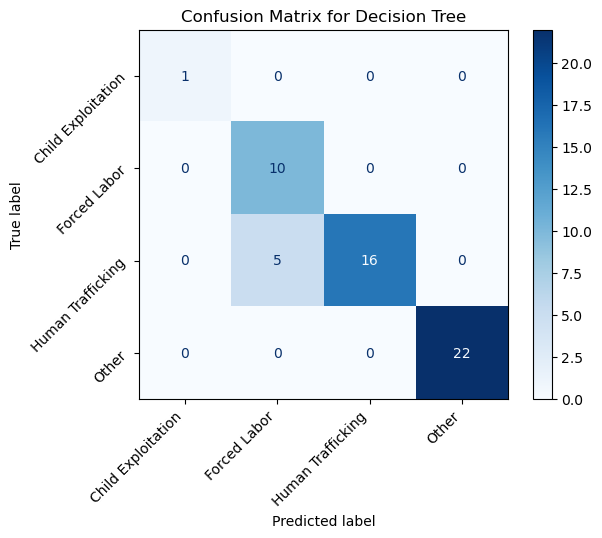

In [1599]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())

# Ensuring correct number of labels for axes
plt.xticks(ticks=range(len(clf.classes_)), labels=clf.classes_, rotation=45, ha='right', fontsize=10)
plt.yticks(ticks=range(len(clf.classes_)), labels=clf.classes_, rotation=45, ha='right', fontsize=10)

plt.title('Confusion Matrix for Decision Tree')
plt.show()

Confusion Matrix:

Forced Labor: Both instances were correctly classified.

Human Trafficking: 16 out of 21 instances were correctly classified, with 5 misclassifications.

Other: All 22 instances were correctly classified.

#### Feature importance 

In [1602]:
# Access the fitted classifier from the pipeline
classifier = clf.named_steps['classifier']

# Get feature importances from the fitted model
importances = classifier.feature_importances_

# Get feature names after preprocessing
feature_names = clf.named_steps['preprocessor'].transformers_[0][1].named_steps['encoder'].get_feature_names_out()
# Add non-categorical features
non_cat_features = X.drop(categorical_features, axis=1).columns
all_feature_names = np.concatenate([feature_names, non_cat_features])

# Creating a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10)) 

                                               Feature  Importance
135                                Lack of basic needs    0.413711
141  Criminal justice mechanisms function effective...    0.410811
139                      Total Vulnerability score (%)    0.066168
138                                Effects of conflict    0.065677
113                                            x0_Togo    0.022624
75                                         x0_Mongolia    0.021008
103                                    x0_South Africa    0.000000
104                                     x0_South Sudan    0.000000
102                                         x0_Somalia    0.000000
105                                           x0_Spain    0.000000


### Observations


1.Lack of Basic Needs (0.413711):

-This feature is the most important for the model, contributing approximately 41.4% to the predictions. It suggests that the lack of basic need is       a major determinant in predicting the target variable, indicating its significant role in understanding modern slavery issues.

2. Criminal Justice Mechanisms Function Effectively (0.410811):

    -This feature is also highly important, contributing about 41.1% to the model’s predictions. It implies that how well the criminal justice mechanisms function is crucial for predicting modern slavery. Effective criminal justice mechanisms may correlate strongly with lower levels of modern slavery.

3. Total Vulnerability Score (%) (0.066168):

   -This feature has a relatively lower importance, contributing around 6.6%. It indicates that while the total vulnerability score is relevant, it is less critical compared to the first two features. It still plays a role in the model but is not as influential.

Features related to specific countries like South Africa, Serbis,Romania, Russia and Rwanda have minor or no impact on the model's predictions.

### Plotting a Decision Tree

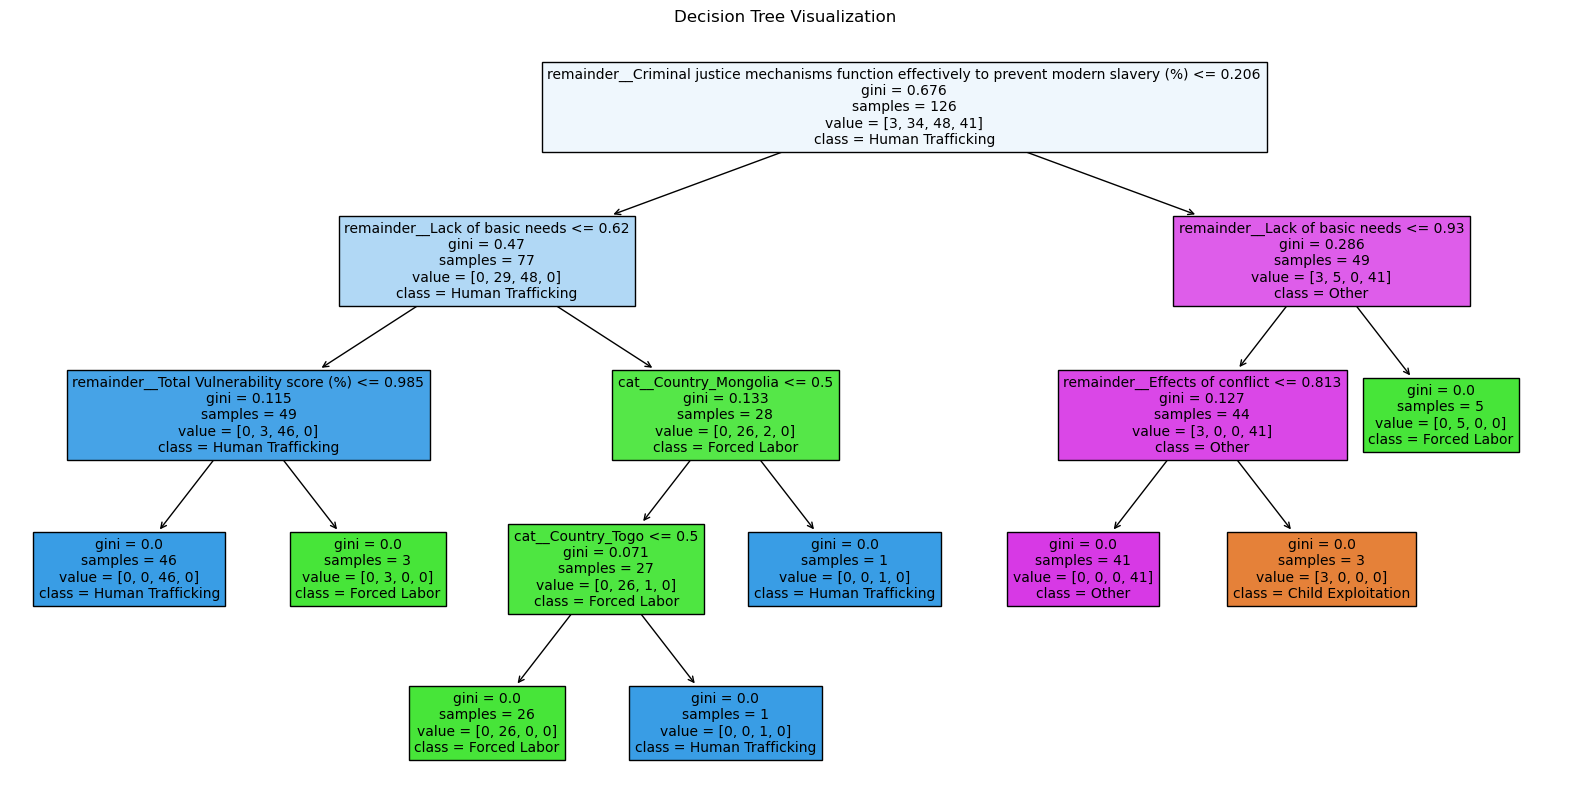

In [1606]:
# Plotting the tree
plt.figure(figsize=(20, 10)) 
plot_tree(
    clf.named_steps['classifier'],
    feature_names=clf.named_steps['preprocessor'].get_feature_names_out(),
    class_names=clf.named_steps['classifier'].classes_,
    filled=True,
    fontsize=10 
)

# Rotate labels
plt.xticks(rotation=100)

plt.title('Decision Tree Visualization')
plt.show()

### Applying Hyperparameter Tuning to Decision Tree

In [1608]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Defining the hyperparameters to search
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Initializing GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Country', 'Region'], dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [1609]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


In [1610]:
# Predict on the test data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy after Tuning: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Generate a confusion matrix
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy after Tuning: 0.9074074074074074
                    precision    recall  f1-score   support

Child Exploitation       1.00      1.00      1.00         1
      Forced Labor       0.67      1.00      0.80        10
 Human Trafficking       1.00      0.76      0.86        21
             Other       1.00      1.00      1.00        22

          accuracy                           0.91        54
         macro avg       0.92      0.94      0.92        54
      weighted avg       0.94      0.91      0.91        54

[[ 1  0  0  0]
 [ 0 10  0  0]
 [ 0  5 16  0]
 [ 0  0  0 22]]


From the Output, there is  NO difference in accuracy even after tuning the paramaters in decision trees. 
Reason: the model might have reached its best possible performance with the given data, meaning that further tuning doesn't yield better results.

## RECOMMENDATIONS

### Recommendations on the modern slavery data

 1.Address the Lack of Basic Needs:

 The "Lack of Basic Needs" feature is the most influential, highlighting the critical role that access to essential resources plays in modern slavery.
Recommendation: Prioritize programs that address basic needs such as food, clean water, shelter, and healthcare. Efforts should focus on providing these necessities to at-risk populations to reduce their vulnerability to exploitation.

    2.Enhance Criminal Justice Mechanisms:

The "Criminal Justice Mechanisms" feature is also highly significant, indicating that effective legal systems are crucial in combating modern slavery.
Recommendation: Invest in strengthening the criminal justice systems in regions where they are weak. This includes improving law enforcement practices, increasing the capacity for investigations, and ensuring that perpetrators are held accountable. Special attention should be given to areas where criminal justice mechanisms are currently ineffective.

    3.Focus on Vulnerability Reduction:

The "Total Vulnerability Score (%)" and "Effects of Conflict" are relevant but less significant compared to basic needs and criminal justice mechanisms.
Recommendation: Implement comprehensive vulnerability reduction programs that address broader socio-economic issues, such as economic instability, educational deficits, and healthcare access. By improving these areas, the risk of modern slavery can be mitigated.

    4.Localize Interventions Based on Context:


 Some country-specific features show minimal impact in the model.
Recommendation: While the model indicates that certain country features may not be as influential, localized interventions tailored to regional needs and conditions are essential. Adapt anti-slavery strategies to the specific contexts of each country or region for more effective outcomes.

   5.Improve Data Collection and Monitoring:

The model's feature importance underscores the need for better data.
Recommendation: Enhance data collection efforts to capture comprehensive and accurate information on factors influencing modern slavery. Continuous monitoring and updating of data will help refine interventions and improve future predictive models.

### Conclusions on the data 


The feature importance analysis reveals that "Lack of Basic Needs" and "Criminal Justice Mechanisms" are the most critical factors influencing modern slavery. These insights underscore the necessity of addressing fundamental socio-economic needs and strengthening legal systems as primary strategies to combat modern slavery.

"Total Vulnerability Score (%)" and "Effects of Conflict" also contribute to the model but to a lesser extent. This indicates that while these factors are relevant, they should be integrated into a broader approach that includes addressing basic needs and improving criminal justice mechanisms.

The dataset highlights that countries with significant vulnerabilities and conflict, such as Afghanistan, require targeted interventions focusing on immediate needs and long-term stabilization. In contrast, countries like Albania and Algeria, while showing moderate to lower vulnerabilities, still need effective responses to manage and mitigate risks of modern slavery.

In summary, combating modern slavery effectively requires a multi-faceted approach that includes enhancing basic needs, strengthening criminal justice systems, addressing socio-economic vulnerabilities, and implementing localized, context-specific interventions. This comprehensive strategy will enable stakeholders to protect vulnerable populations and make significant progress toward eradicating modern slavery.

### Recommendations on the Models perfomance

    1. Address Class Imbalance:

Observation: The Decision Tree model showed high accuracy (90.7%) but struggled with minority classes, such as "Forced Labor," where it achieved a medium precision (0.67) and recall (1.00). This suggests the model may be overfitting to the majority classes.

Recommendation: Implement techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class-weight adjustments to better balance the dataset. This can help models better identify and predict minority classes, improving overall model performance, especially for underrepresented categories.

    2.Model Selection Based on Context:

Observation: The Decision Tree model demonstrated strong overall accuracy and excelled in certain classes, like "Other," where it achieved perfect precision and recall. However, it showed weaknesses in handling minority classes.

Recommendation: For tasks requiring high accuracy and the ability to capture complex patterns, ensemble methods such as Random Forests or Gradient Boosting are recommended. These methods could improve performance by reducing the variance seen in single decision trees. For tasks where interpretability is critical, a simpler model like Logistic Regression might be preferable.

     3.Hyperparameter Tuning:

Observation: The performance differences between the tuned Decision Tree and Logistic Regression models were marginal, indicating that both models might already be close to their optimal performance for this dataset.

Recommendation: While further tuning might yield only slight improvements, it is still worthwhile to explore hyperparameter adjustments, particularly for the Decision Tree model, to prevent overfitting and improve its handling of minority classes.

   4.Consideration for Ensemble Methods:

Observation: The Decision Tree model’s high accuracy suggests that tree-based methods are effective for this dataset, but its performance on minority classes was less satisfactory.

Recommendation: Experiment with ensemble methods like Random Forests or Gradient Boosting. These approaches can combine multiple decision trees to reduce overfitting and enhance the model’s ability to generalize, particularly in handling imbalanced datasets.

    5.Improvement in Data Representation:

Observation: The performance of both models highlights the importance of data representation, especially in how features like "Lack of Basic Needs" and "Criminal Justice Mechanisms" are utilized.

Recommendation: Consider feature engineering to create new variables or improve existing ones. This might involve creating interaction terms, normalizing variables, or using domain-specific knowledge to refine the input data. Improved feature representation can significantly enhance model accuracy and reliability.

### Conclusion on Model Performance

Both Logistic Regression and Decision Tree models demonstrated strong overall accuracy, with Decision Trees slightly outperforming Logistic Regression in accuracy. However, the performance varied across different classes:

Logistic Regression: This model provided a balanced performance across classes and handled the dataset’s imbalance better than the Decision Tree, making it suitable for tasks requiring straightforward decision boundaries and high interpretability.

Decision Tree: This model achieved higher overall accuracy but struggled with minority classes, such as "Forced Labor." This suggests that while Decision Trees are powerful for capturing complex relationships, they are sensitive to class imbalance and may require techniques like boosting or balancing to optimize their performance.

Both models are effective, but the choice between them should be guided by the specific requirements of the task—whether it’s interpretability and generalization (favoring Logistic Regression) or maximizing accuracy through capturing complex patterns (favoring Decision Trees or ensemble methods). Balancing the dataset and tuning hyperparameters are essential steps to further enhance model performance.